In [54]:
import requests
from datetime import datetime
import numpy as np
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

In [3]:
from config import weather_api_key

In [10]:
# print 500 random lats
lats = np.random.uniform(-90.000, 90.000, 1500)
lngs = np.random.uniform(-180,180,1500)
lat_lngs = list(zip(lats,lngs))

In [19]:
# Use the tuple() function to display the latitude and longitude combinations.
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
# print(cities)

In [21]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = ""
units = "Imperial"
# query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | egvekinot
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | maragogi
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | kelo
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | tiznit
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | tabas
Processing Record 16 of Set 1 | mayo
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | tucumcari
Processing Record 21 of Set 1 | sakakah
Processing Record 22 of Set 1 | deputatskiy

Processing Record 34 of Set 4 | la paz
Processing Record 35 of Set 4 | san ramon
Processing Record 36 of Set 4 | ouadda
Processing Record 37 of Set 4 | southbridge
Processing Record 38 of Set 4 | sept-iles
Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | abu jubayhah
City not found. Skipping...
Processing Record 41 of Set 4 | maceio
Processing Record 42 of Set 4 | moerai
Processing Record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 4 | sambava
Processing Record 45 of Set 4 | umm lajj
Processing Record 46 of Set 4 | virginia beach
Processing Record 47 of Set 4 | srednekolymsk
Processing Record 48 of Set 4 | puerto baquerizo moreno
Processing Record 49 of Set 4 | sinkat
City not found. Skipping...
Processing Record 50 of Set 4 | erdaojiang
Processing Record 1 of Set 5 | keuruu
Processing Record 2 of Set 5 | lompoc
Processing Record 3 of Set 5 | akdepe
Processing Record 4 of Set 5 | mar del plata
Processing Record 5 of Set 5 | 

City not found. Skipping...
Processing Record 22 of Set 8 | pangnirtung
Processing Record 23 of Set 8 | sabang
Processing Record 24 of Set 8 | veinticinco de mayo
Processing Record 25 of Set 8 | kahului
Processing Record 26 of Set 8 | adrar
Processing Record 27 of Set 8 | qaqortoq
Processing Record 28 of Set 8 | comodoro rivadavia
Processing Record 29 of Set 8 | neyshabur
Processing Record 30 of Set 8 | beringovskiy
Processing Record 31 of Set 8 | merauke
Processing Record 32 of Set 8 | hualmay
Processing Record 33 of Set 8 | amderma
City not found. Skipping...
Processing Record 34 of Set 8 | bathsheba
Processing Record 35 of Set 8 | mega
Processing Record 36 of Set 8 | port blair
Processing Record 37 of Set 8 | metu
Processing Record 38 of Set 8 | sobolevo
Processing Record 39 of Set 8 | codrington
Processing Record 40 of Set 8 | kloulklubed
Processing Record 41 of Set 8 | dwarka
Processing Record 42 of Set 8 | vao
Processing Record 43 of Set 8 | naantali
Processing Record 44 of Set 8

City not found. Skipping...
Processing Record 9 of Set 12 | fairbanks
Processing Record 10 of Set 12 | dong hoi
Processing Record 11 of Set 12 | stromness
Processing Record 12 of Set 12 | urengoy
Processing Record 13 of Set 12 | elliot lake
Processing Record 14 of Set 12 | gizo
Processing Record 15 of Set 12 | roches noires
City not found. Skipping...
Processing Record 16 of Set 12 | suntar
Processing Record 17 of Set 12 | acapulco
Processing Record 18 of Set 12 | gulshat
City not found. Skipping...
Processing Record 19 of Set 12 | berdigestyakh
Processing Record 20 of Set 12 | hjelset
Processing Record 21 of Set 12 | roma
Processing Record 22 of Set 12 | qabis
City not found. Skipping...
Processing Record 23 of Set 12 | homa bay
Processing Record 24 of Set 12 | arona
Processing Record 25 of Set 12 | buluang
Processing Record 26 of Set 12 | griffith
Processing Record 27 of Set 12 | mahasamund
Processing Record 28 of Set 12 | tubruq
City not found. Skipping...
Processing Record 29 of Se

In [28]:
# check length of city data
print(len(city_data))

568


In [37]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ['City', 'Country','Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lata,PT,2021-03-27 18:52:22,40.1629,-8.3327,61.00,75,67,5.99
1,Avarua,CK,2021-03-27 18:52:23,-21.2078,-159.7750,82.40,78,75,14.97
2,Port Alfred,ZA,2021-03-27 18:52:23,-33.5906,26.8910,67.87,67,78,17.05
3,Egvekinot,RU,2021-03-27 18:49:38,66.3167,-179.1667,-16.98,97,55,2.46
4,Nikolskoye,RU,2021-03-27 18:52:25,59.7035,30.7861,42.80,61,0,4.47
...,...,...,...,...,...,...,...,...,...
563,Pavlohrad,UA,2021-03-27 18:58:20,48.5167,35.8667,41.00,75,0,6.71
564,Port Hardy,CA,2021-03-27 18:58:21,50.6996,-127.4199,46.40,87,90,8.05
565,Capoeiras,BR,2021-03-27 18:58:21,-8.7347,-36.6267,74.89,68,59,8.52
566,Guilin,CN,2021-03-27 18:58:21,25.2819,110.2864,66.20,100,75,1.70


In [38]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [44]:
today = time.strftime("%x")
print(today)

03/27/21


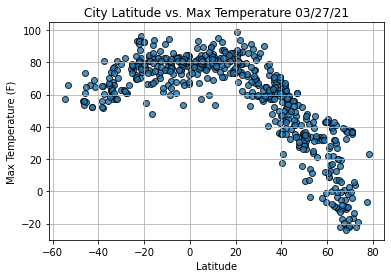

In [83]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

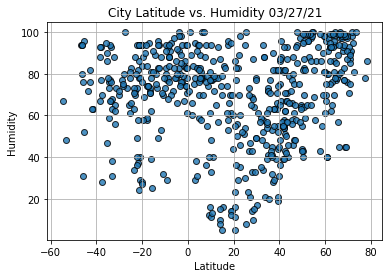

In [49]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig2.png")

# Show plot.
plt.show()

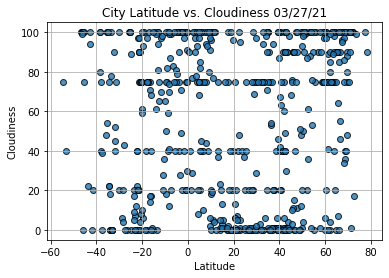

In [50]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig3.png")

# Show plot.
plt.show()

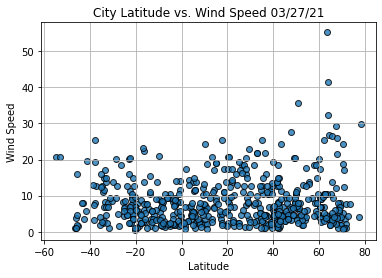

In [51]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig4.png")

# Show plot.
plt.show()

In [87]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r value is: {r_value}")
    print(f"The p value is: {p_value}")
    print(f"The standard error is: {std_err}")

In [63]:
# separate df by northern and southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Avarua,CK,2021-03-27 18:52:23,-21.2078,-159.7750,82.40,78,75,14.97
2,Port Alfred,ZA,2021-03-27 18:52:23,-33.5906,26.8910,67.87,67,78,17.05
6,Maragogi,BR,2021-03-27 18:52:25,-9.0122,-35.2225,80.51,77,75,8.50
8,Busselton,AU,2021-03-27 18:52:26,-33.6500,115.3333,57.00,93,0,8.23
9,Pisco,PE,2021-03-27 18:52:26,-13.7000,-76.2167,72.00,73,0,10.36


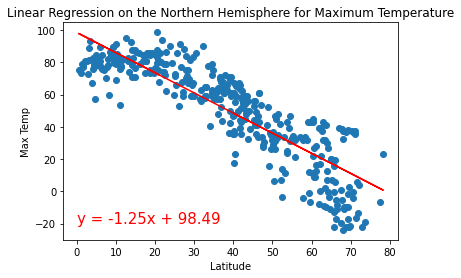

The r value is: -0.8665079812485589
The p value is: 4.0780229733135013e-116
The standard error is: 0.03700062687595578


In [91]:
# Linear regression on the Northern Hemisphere and Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,-20))

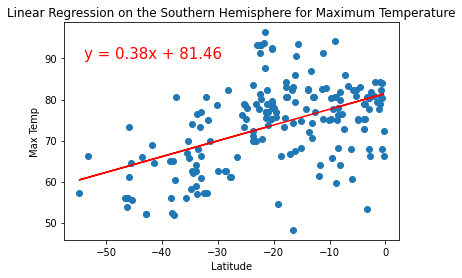

The r value is: 0.48997813381092786
The p value is: 9.569319857927299e-13
The standard error is: 0.050150529074091385


In [92]:
# Linear regression on the Southern Hemisphere and Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-54,90))

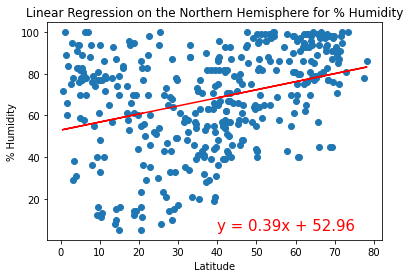

The r value is: 0.3320875883618903
The p value is: 3.101416739983709e-11
The standard error is: 0.05667547956352852


In [106]:
# Linear regression on the Northern Hemisphere and Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,5))

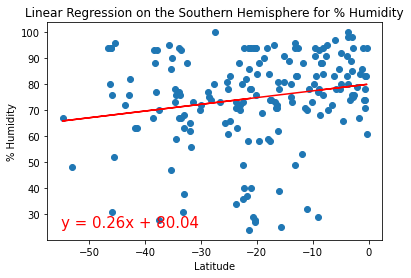

The r value is: 0.1880897426348962
The p value is: 0.009741596870578614
The standard error is: 0.09885028561512067


In [105]:
# Linear regression on the Southern Hemisphere and Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,25))

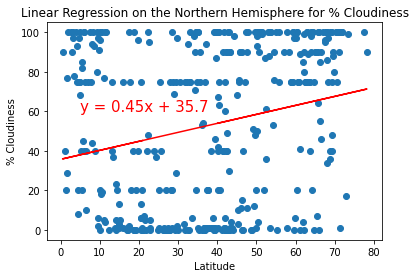

The r value is: 0.23291995546107264
The p value is: 4.459020822549008e-06
The standard error is: 0.09769019688091228


In [115]:
# Linear regression on the Northern Hemisphere and Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(5,60))

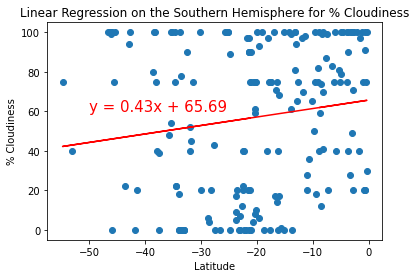

The r value is: 0.1478656327396475
The p value is: 0.04286169700021467
The standard error is: 0.2101142785883733


In [117]:
# Linear regression on the Southern Hemisphere and Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

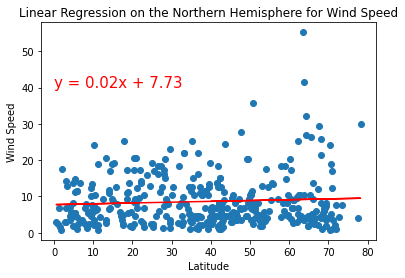

The r value is: 0.0661646690352984
The p value is: 0.19811231243339814
The standard error is: 0.01741514950958243


In [120]:
# Linear regression on the Northern Hemisphere and Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,40))

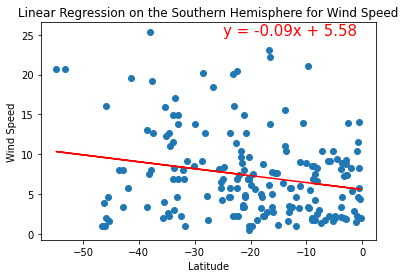

The r value is: -0.21366618612420046
The p value is: 0.003238104909051931
The standard error is: 0.029156665379394615


In [127]:
# Linear regression on the Southern Hemisphere and Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-25,25))